In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.0.0'

#### 使用 Fashion MNIST数据集作为训练数据，该数据包含10个类别衣服类型，总共有70000个灰度图像，图像的像素都是28x28像素，对应

#### 的数据标签如下:{0:T恤, 1:裤子，2:套衫, 3:连衣裙, 4:外套, 5:凉鞋, 6:衬衫, 7:运动鞋, 8:手提包, 9:踝靴}

> 从tf直接加载`Fashion MNIST`数据，使用60000张图像作为训练数据, 10000张图像作为测试数据

In [4]:
fashion_datasets = keras.datasets.fashion_mnist
(train_image, train_labels), (test_images, test_labels) = fashion_datasets.load_data()

In [7]:
print("训练数据:", train_image.shape)
print("训练数据的最大值:", train_image[0].max())
print("训练数据的最小值:", train_image.min())

训练数据: (60000, 28, 28)
训练数据的最大值: 255
训练数据的最小值: 0


In [8]:
print("训练数据标签:",train_labels.shape)

训练数据标签: (60000,)


In [10]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

> 可视化数据

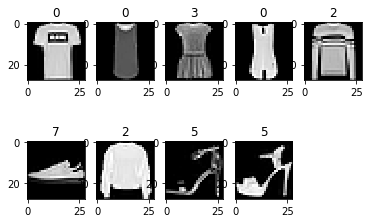

In [19]:
plt.figure()
for i in range(1,10):
    plt.subplot(2,5,i)
    plt.imshow(train_image[i],cmap="gray")
    plt.title(train_labels[i])
plt.show()

In [90]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28),name="input"))  # 输入的时候必须加上name的定义，否则在评估模型的时候会出现张量类型错误
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [91]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [92]:
model.fit(train_image, train_labels, epochs=10, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 2.4794 - acc: 0.7089
Epoch 2/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.6139 - acc: 0.7979
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5469 - acc: 0.8172
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5175 - acc: 0.8279
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4930 - acc: 0.8353
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4798 - acc: 0.8399
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4778 - acc: 0.8420
Epoch 8/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4727 - acc: 0.8422
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4584 - acc: 0.8466
Epoch 10/10
60000/60000 [==============================] - 

In [93]:
model.input_shape

(None, 28, 28)

In [94]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.4232 - acc: 0.8361

Test accuracy: 0.8361


In [115]:
pre = model.predict(test_images)

In [116]:
pre.shape

(10000, 10)

> 模型预测的输出是每张图片对应真实label的概率，哪个类别对应的概率最大，表示模型预测该图片属于哪个类

In [125]:
for i in range(10):
    true_labels = test_labels[i]
    pre_labels = np.argmax(pre[i])
    print("第"+str(i)+"张图片的真实标签是:",true_labels, "预测标签是:",pre_labels)

第0张图片的真实标签是: 9 预测标签是: 9
第1张图片的真实标签是: 2 预测标签是: 2
第2张图片的真实标签是: 1 预测标签是: 1
第3张图片的真实标签是: 1 预测标签是: 1
第4张图片的真实标签是: 6 预测标签是: 6
第5张图片的真实标签是: 1 预测标签是: 1
第6张图片的真实标签是: 4 预测标签是: 4
第7张图片的真实标签是: 6 预测标签是: 6
第8张图片的真实标签是: 5 预测标签是: 5
第9张图片的真实标签是: 7 预测标签是: 7


In [128]:
# 单张图片的预测
img = np.expand_dims(test_images[0], axis=0) # 输入必须是三维，单张图片的预测相当于batch_size=1
img.shape

(1, 28, 28)

In [129]:
model.predict(img)

array([[1.29154664e-20, 1.66852242e-16, 0.00000000e+00, 5.99512370e-14,
        0.00000000e+00, 1.32514080e-02, 3.61769030e-27, 7.37906918e-02,
        1.70840701e-19, 9.12957907e-01]], dtype=float32)

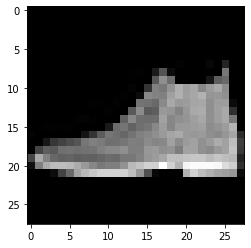

In [132]:
# 显示测试集的第一张图片
plt.imshow(test_images[0],cmap="gray")
plt.show()

#### 保存模型和加载模型

*  只保存权重: model.save_weight,加载方法为model.load_weights("")
*  模型权重全部保存:model.save,加载方法为keras.model.load_model("")

In [133]:
model.save_weights("./checkpoints/my_checkpoint")

In [134]:
model.save("./checkpoints/fashion.h5")